In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('survey.csv')

In [5]:
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.drop(['comments', 'state', 'Timestamp'], axis=1, inplace=True)

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
X = df.drop('treatment', axis=1)  # Features
y = df['treatment']  # Target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [13]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       181
           1       0.74      0.71      0.72       197

    accuracy                           0.72       378
   macro avg       0.72      0.72      0.72       378
weighted avg       0.72      0.72      0.72       378

[[133  48]
 [ 58 139]]


Decision Tree Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       181
           1       0.66      0.64      0.65       197

    accuracy                           0.65       378
   macro avg       0.65      0.65      0.65       378
weighted avg       0.65      0.65      0.65       378

[[117  64]
 [ 70 127]]


Random Forest Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       181
           1       0.77      0.76      0.76       197

    accuracy                           

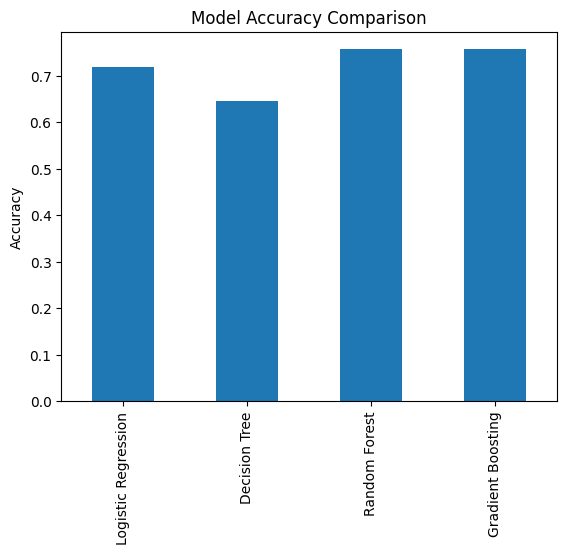

In [14]:
# Display the results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.plot(kind='bar', legend=False)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [15]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

In [16]:
# Display Prediction Results
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_results.head()

,Actual,Predicted
76,0,0
1026,0,0
43,0,1
666,0,1
529,1,1


# New Section

In [19]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.5 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

In [22]:
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [23]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [24]:
X = df.drop('treatment', axis=1)  # Features
y = df['treatment']  # Target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [28]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       181
           1       0.74      0.71      0.72       197

    accuracy                           0.72       378
   macro avg       0.72      0.72      0.72       378
weighted avg       0.72      0.72      0.72       378

[[133  48]
 [ 58 139]]


Decision Tree Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       181
           1       0.69      0.69      0.69       197

    accuracy                           0.68       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.68      0.68      0.68       378

[[121  60]
 [ 62 135]]


Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       181
           1       0.77      0.73      0.75       197

    accuracy                           

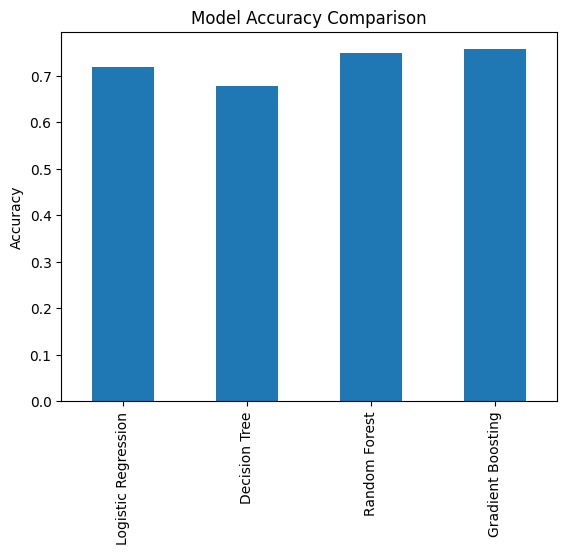

In [29]:
# Display the results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.plot(kind='bar', legend=False)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [30]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

In [31]:
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_results.head()

,Actual,Predicted
76,0,1
1026,0,0
43,0,0
666,0,1
529,1,1


In [34]:
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importances = pd.DataFrame(best_model.feature_importances_,
                                       index=X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

                           importance
family_history               0.266092
work_interfere               0.264420
care_options                 0.104957
Gender                       0.064374
Country                      0.063801
no_employees                 0.027888
benefits                     0.021679
coworkers                    0.021109
leave                        0.019416
obs_consequence              0.017441
phys_health_interview        0.016667
supervisor                   0.016498
wellness_program             0.014294
mental_health_consequence    0.013362
mental_health_interview      0.013045
mental_vs_physical           0.011452
seek_help                    0.009716
phys_health_consequence      0.008945
remote_work                  0.007986
anonymity                    0.005948
self_employed                0.005828
tech_company                 0.005082
Age                          0.000000


In [42]:
explainer = shap.Explainer(best_model, X_train)  # Ensure X_train is used here
shap_values = explainer(X_test, check_additivity=False)  # Disable additivity check

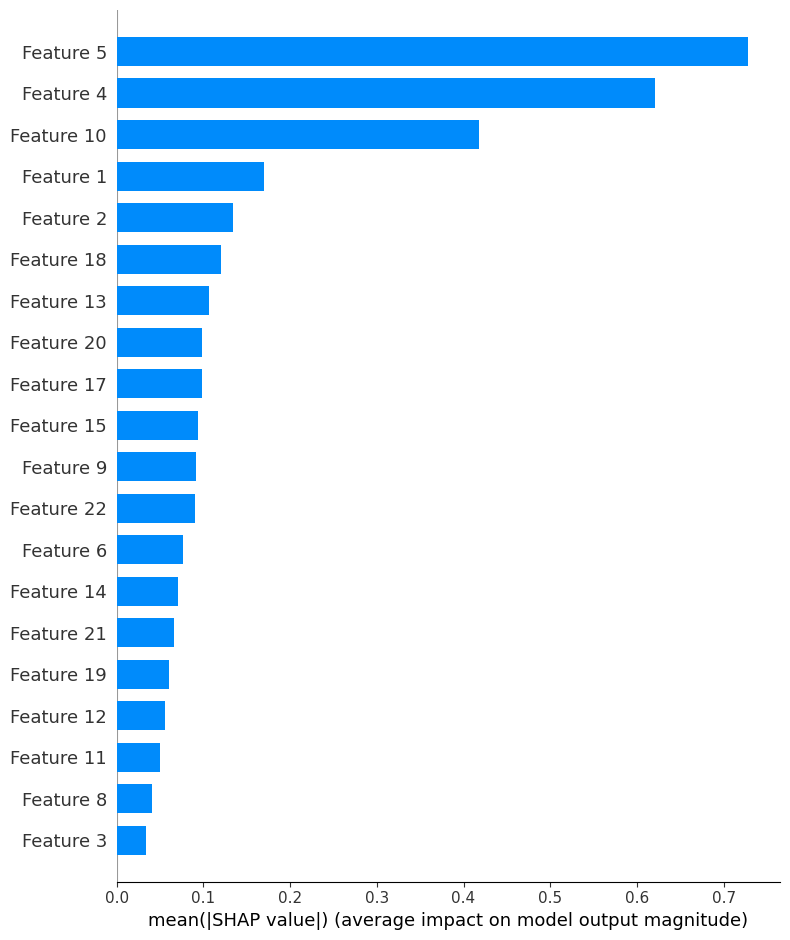

In [43]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

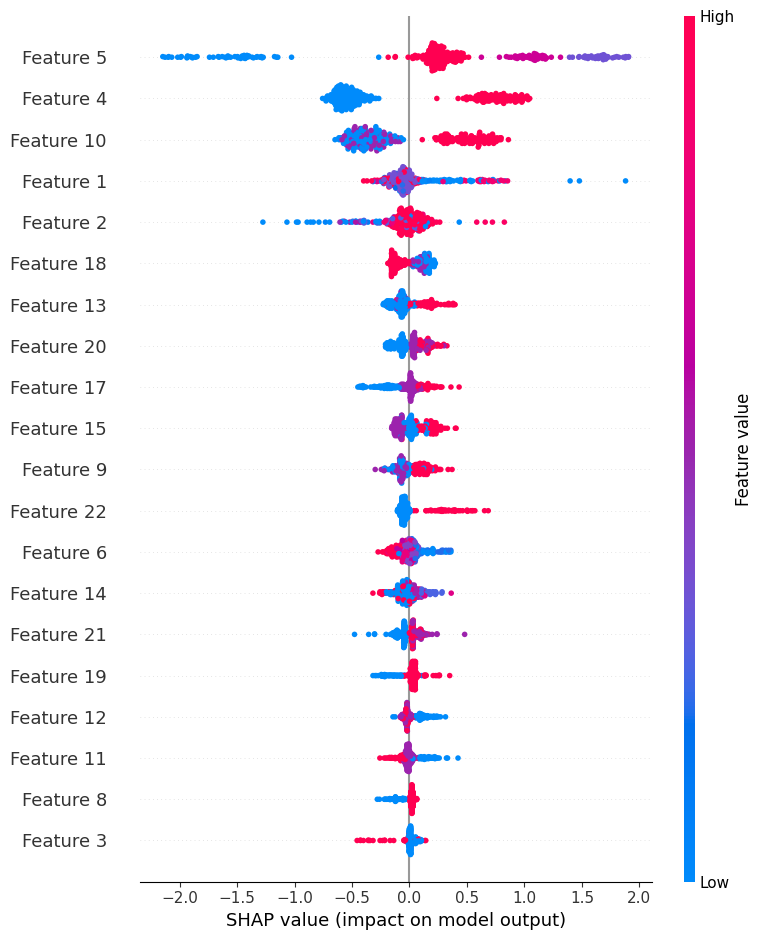

In [44]:
shap.summary_plot(shap_values, X_test)

In [45]:
timing_features = [col for col in X.columns if 'time' in col.lower() or 'hour' in col.lower()]

In [46]:
for feature in timing_features:
    shap.dependence_plot(feature, shap_values.values, X_test, interaction_index=None)

# New Section